## 概率题目概率过

这题在第一阶段提示出来之前完全不敢碰，还以为又是什么APL逆向之类的狠活。
第一阶段提示出来之后思路就很明显了: 第一步拿到Eval，第二步执行JavaScript拿到之前输入过的内容。

### Flag 1

Flag 1 拿Eval非常简单，虽然`eval`不能用，但是jQuery提供的globalEval可以用，所以直接就可以执行任意JavaScript了。

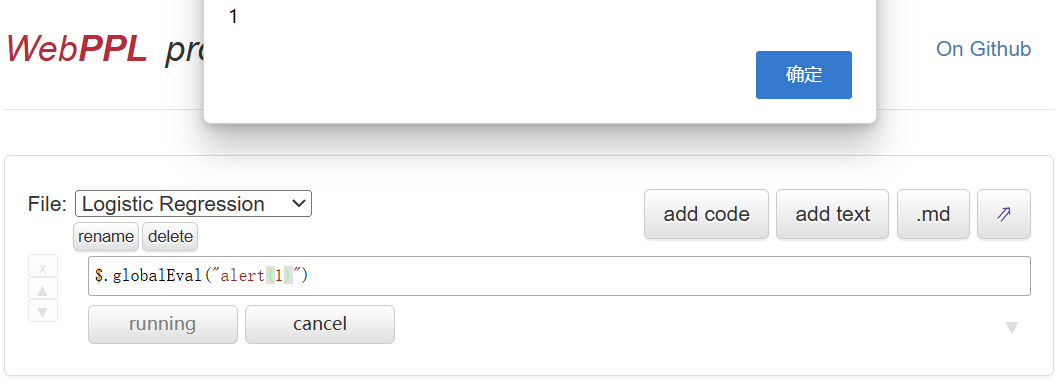

相对比较困难的是怎么找到之前输入的内容。注意力集中的同学可能可以瞪眼法瞪出来，但是我是不行的，所以只能用Heap Snapshot来找了。具体方法是：

1. 先运行`console.log("好好好好好")`
2. 再运行`console.log("11111")`
3. 点开开发者工具，点击内存，录制一个Heap Snapshot
4. 搜索所有包含"好好好”的字符串

然后我们就可以找到多个"好好好好好"字符串，是可以通过JavaScript访问的。
Chrome贴心的把所有在全局环境中能访问的JS对象都加上了一个图标。这里我们随便选一个能访问的对象，然后尝试用JavaScript访问它：

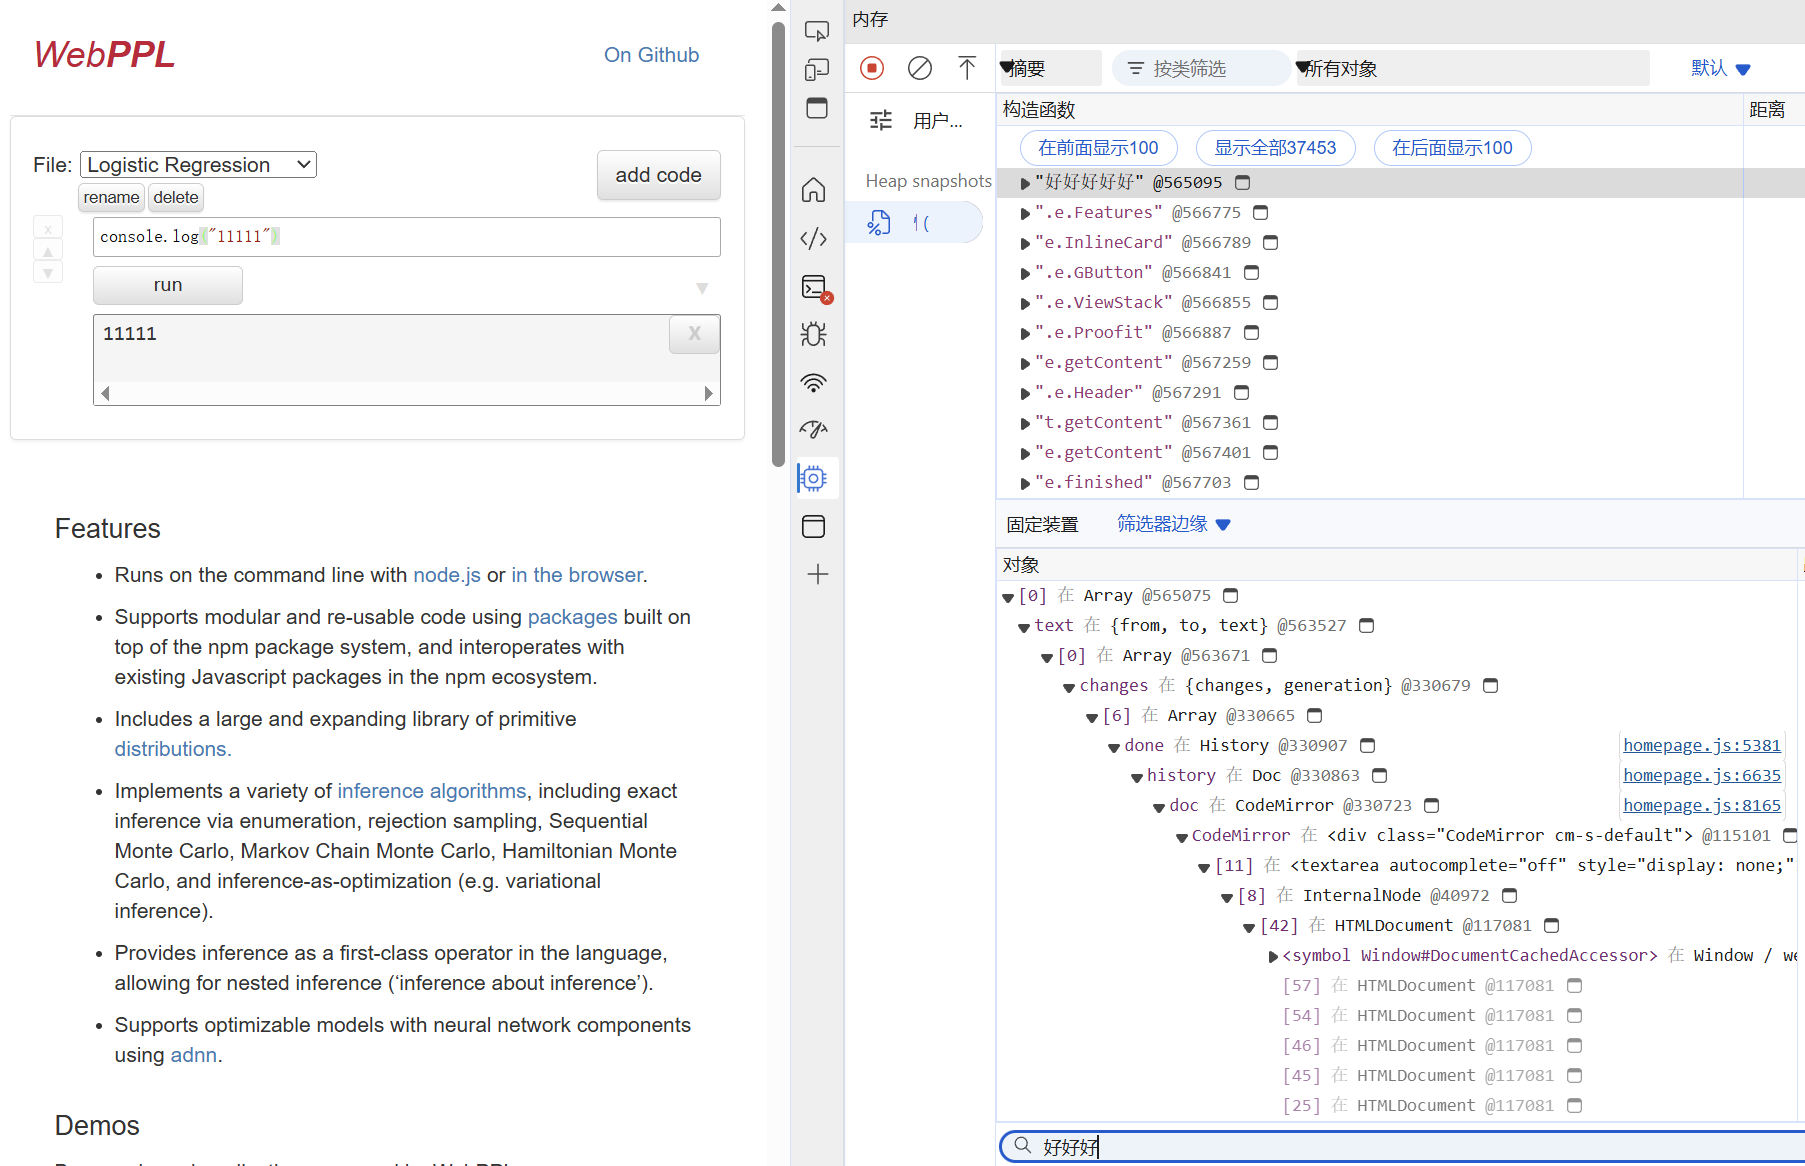

CodeMirror还真的在CodeMirror.doc.history里存了所有的编辑历史。所以我们可以直接访问这个对象，设置document.title:

```javascript
$.globalEval('var a = document.querySelector(".CodeMirror").CodeMirror.doc.history.done; var b = "";for (var i = 0; i < a.length; i++) {if (a[i].changes) {b += a[i].changes[0].text;}}; console.log(b);document.title = b;')
```

### Flag 2

Flag2要求我们在Node里构造Eval。NodeJS早就被各路老赛棍打遍了，我们可以在这篇[WriteUp](https://ctftime.org/writeup/36146)找到一个构造函数的方法：

```javascript
var a = new Array(); a.constructor.constructor('var { exec } = require("child_process"); exec("/flag2", (a,b,c) => console.log(a,b,c));')();
```

蛤，没有require? 但是我们有import。